# LDA Implementation

In [381]:
# import all the packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [518]:
# Create 2 Gaussian Distributions 100x2 matrix with equal number of samples for each class

mean_0 = np.array([2,2]) # mean for class 0
cov_0 = np.array([[2,0],[0,2]]) # Covariance for class 0
mean_1 = np.array([-2,-2]) # mean for class 1
cov_1 = np.array([[1,0],[0,1]]) # Covariance for class 1
N = 100 # Samples

# First Gaussian Cloud
X_0 = np.random.multivariate_normal(mean_0, cov_0, N)
y_0 = np.array([0]*N)

# Second Gaussian Cloud
X_1 = np.random.multivariate_normal(mean_1, cov_1, N)
y_1 = np.array([1]*N)

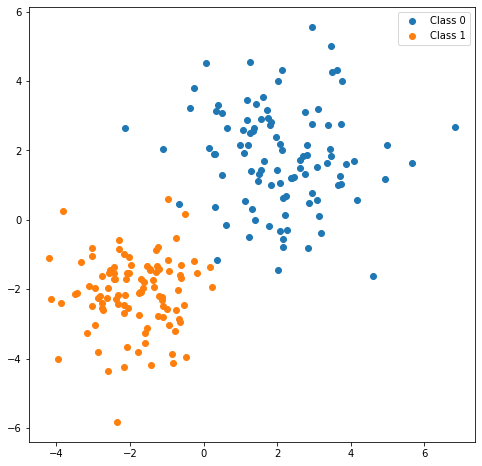

In [519]:
# plot the 2 distributions
plt.figure(figsize=(8,8))
plt.scatter(X_0[:,0], X_0[:,1], label="Class 0")
plt.scatter(X_1[:,0], X_1[:,1], label="Class 1")
plt.legend()
plt.show()

In [520]:
# combine both gaussians
X = np.concatenate((X_0, X_1), axis=0)
y = np.concatenate((y_0, y_1), axis=0)

LDA Decision Function (Linear Decision Boundary)

$$
f(X) = 2*(\mu_2^{T} - \mu_1^{T})\Sigma^{-1}X + \mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2 + 2*\ln(\frac{P(Y=1)}{P(Y=0)})
$$

$$
\hat Y = \left\{
        \begin{array}\\
            class 1 & \mbox{if} \ f(X) < 0 \\
            class 2 & \mbox{if} \ f(X) > 0
        \end{array}
        \right.
$$

In [592]:
def fit(X, y, cov, mean_1, mean_2):
    P_Y_1 = np.mean(y==1)
    P_Y_0 = 1 - P_Y_1
    
    first_term = 2*np.dot((mean_2-mean_1), np.linalg.solve(cov, X.T))
    second_term = np.dot(mean_1.T, np.linalg.solve(cov, mean_1)) - np.dot(mean_2.T, np.linalg.solve(cov, mean_2))
    third_term = 2 * np.log(P_Y_1 / P_Y_0)
    
    fx = first_term + second_term + third_term

    return fx

In [593]:
def predict(y, fx):
    fx.setflags(write=1)
    fx[fx<0] = 0
    fx[fx>0] = 1
    Yhat = fx
    return Yhat

In [594]:
def accuracy(y,Yhat):
    accuracy = np.mean(y==Yhat)
    misclassfication = np.where(y!=Yhat)
    return accuracy, misclassfication

In [595]:
fx = fit(X, y, cov_0, mean_0, mean_1)
Yhat = predict(y, fx)

In [596]:
acc, misclassification = accuracy(y, Yhat)
print("Accuracy: {}%".format(acc*100))

Accuracy: 99.0%


In [597]:
# Decision Boundary
w = 2*np.linalg.solve(cov_0, (mean_0-mean_1))
b = np.dot(mean_1.T, np.linalg.solve(cov_0, mean_1)) - np.dot(mean_0.T, np.linalg.solve(cov_0, mean_0)) + 2 * np.log(0.5 / 0.5)
x1 = np.arange(-4,6,1)
x2 = (-b - x1*w[0]) / w[1]

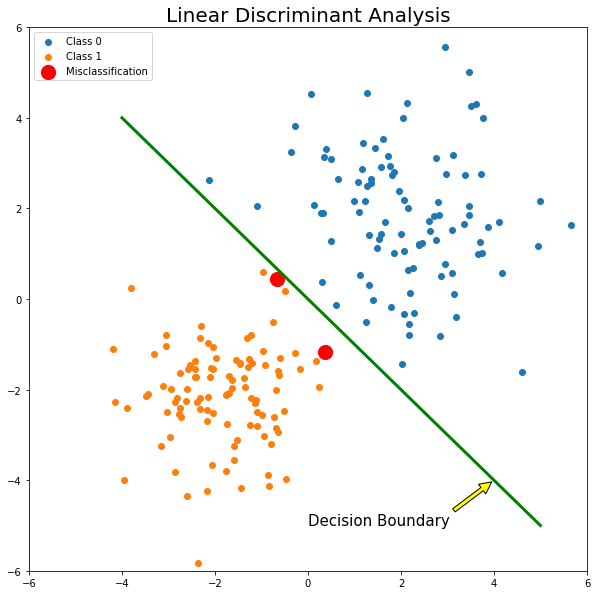

In [598]:
# Plot the data with decision boundary
plt.figure(figsize=(10,10))
plt.title("Linear Discriminant Analysis", fontsize=20)
plt.scatter(X_0[:,0],X_0[:,1], label="Class 0")
plt.scatter(X_1[:,0],X_1[:,1], label="Class 1")
if misclassification:
    plt.scatter(X[misclassification,0], X[misclassification,1], label="Misclassification", s=200, color="red")
plt.plot(x1, x2, color="green", linewidth=3)
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.annotate('Decision Boundary', 
             xy =(4, -4), 
             xytext =(0, -5),  
             arrowprops = dict(facecolor ='yellow', 
                               shrink = 0.05), fontsize=15)
plt.show()

# QDA Implementation

Same problem solve using QDA

QDA Non-Linear Decision Boundary

$$
f(X) = X^{T}(\Sigma_1^{-1} - \Sigma_2^{-1})X + 2*(\mu_2^{T}\Sigma_2^{-1} - \mu_1^{T}\Sigma_1^{-1})X + (\mu_1^{T}\Sigma_1^{-1}\mu_1 - \mu_2^{T}\Sigma_2^{-1}\mu_2) + \ln(\frac{|\Sigma_1|}{|\Sigma_2|}) + 2*\ln(\frac{P(Y=1)}{P(Y=0)})
$$

$$
\hat Y = \left\{
        \begin{array}\\
            class 1 & \mbox{if} \ f(X) < 0 \\
            class 2 & \mbox{if} \ f(X) > 0
        \end{array}
        \right.
$$

In [614]:
def QDA(X, y, cov_1, cov_2, mean_1, mean_2):
    P_Y_1 = np.mean(y==1)
    P_Y_0 = 1. - P_Y_1
    
    first_term = np.dot(X, np.linalg.solve((cov_1-cov_2), X.T))
    second_term = 2*np.dot((np.dot(mean_2.T, np.linalg.inv(cov_2)) - np.dot(mean_1.T, np.linalg.inv(cov_1))), X.T).T
    third_term = np.dot(mean_1.T, np.linalg.solve(cov_1, mean_1)) - np.dot(mean_2.T, np.linalg.solve(cov_2, mean_2))
    fourth_term = np.log(np.linalg.norm(cov_1) / np.linalg.norm(cov_2))
    fifth_term = 2*np.log(P_Y_1 / P_Y_0)
    
    fx = first_term + second_term + third_term + fourth_term + fifth_term
    
    values = np.diag(fx)
    
    return values

In [615]:
fx = QDA(X,y, cov_0, cov_1, mean_0.reshape(mean_0.shape[0],1), mean_1.reshape(mean_1.shape[0],1))

In [616]:
Yhat_1 = predict(y, fx)

In [617]:
accuracy_1, misclassification_1 = accuracy(y, Yhat_1)

In [618]:
print("Accuracy: {}%".format(accuracy_1*100))

Accuracy: 98.0%


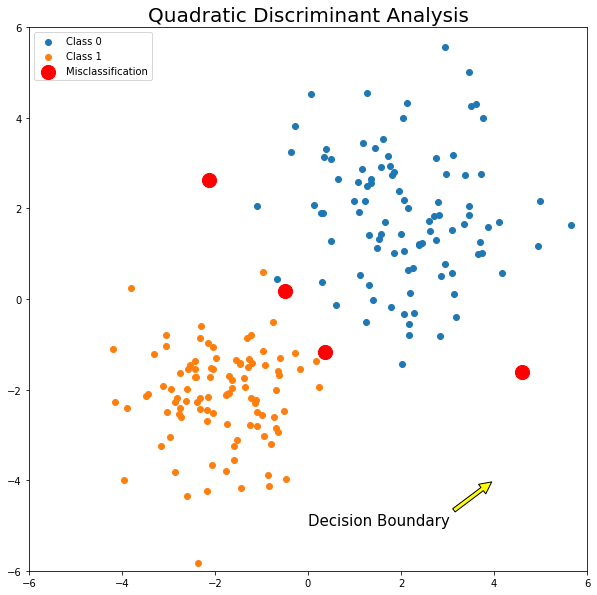

In [619]:
# Plot the data with decision boundary
plt.figure(figsize=(10,10))
plt.title("Quadratic Discriminant Analysis", fontsize=20)
plt.scatter(X_0[:,0],X_0[:,1], label="Class 0")
plt.scatter(X_1[:,0],X_1[:,1], label="Class 1")
if misclassification_1:
    plt.scatter(X[misclassification_1,0], X[misclassification_1,1], label="Misclassification", s=200, color="red")
#plt.plot(x1, x2, color="green", linewidth=3)
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.annotate('Decision Boundary', 
             xy =(4, -4), 
             xytext =(0, -5),  
             arrowprops = dict(facecolor ='yellow', 
                               shrink = 0.05), fontsize=15)
plt.show()